In [5]:
# resource: https://www.kaggle.com/gauravdhiman05/tensorflow-mnist-dnn-digit-recognizer
# load all require packages.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load training data as dataframe
train = pd.read_csv("mnist_train.csv")
# first column is label, excluding that get the bitmap of image. One row in DF represents image of one hand-written number.
# also normalize the data by dividing the values by 255 (max RGB value)
train_image = train.iloc[:,1:]/255
train_image.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# load first column as training label
train_label = train.label
train_label.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [9]:
#  load testing data to evaluate the model later.
test = pd.read_csv("mnist_test.csv")
test_label = test.label
test_label.head() # shows what are first five digits in test dataset.

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [10]:
#  separate the image butmap from label for testing dataset.
test_image = test.drop(columns='label')
test_image = test_image.values.reshape(test_image.shape[0], 28, 28)
test_image = tf.convert_to_tensor(test_image)
test_image[:,0] # bitmap of first image in test dataset.

<tf.Tensor: shape=(10000, 28), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>

In [11]:
#  method to show given number images.
def show_img(img_vector_arr, label_tensor):
    for i in range(len(img_vector_arr)):
        plt.subplot(290 + (i+1))
        plt.imshow(img_vector_arr[i],cmap=plt.get_cmap('gray'))
        if label_tensor is not None:
            plt.title(int(label_tensor[i]))

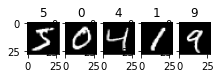

In [12]:
#  just show initial few number images and label to see the kind of data we have in training dataset.
train_image = train_image.values.reshape(train_image.shape[0], 28, 28)
train_image = tf.convert_to_tensor(train_image)
show_img(train_image[0:5], train_label)

In [13]:
# Add hidden layer of RELU neuron
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [14]:
# compile the model with right optimizer, loss function and metric to optimize.
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [15]:
# train the model with training dataset.
model.fit(train_image, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5674 - accuracy: 0.9103
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5135 - accuracy: 0.9525
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5008 - accuracy: 0.9637
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4935 - accuracy: 0.9704
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4886 - accuracy: 0.9750
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4853 - accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4817 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4797 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4780 - accuracy: 0.9844
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.476

In [16]:
#  evaluate how well the model is predicting with test dataset which is not yet seen by model. Calculate accuracy of model.
test_loss, test_acc = model.evaluate(test_image, test_label)
print('Accuracy of model is: {}%'.format(round(test_acc*100, 2)))

313/313 [==============================] - 0s 1ms/step - loss: 1.4859 - accuracy: 0.9753
Accuracy of model is: 97.53%


In [17]:
test_label

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [18]:
test_image

<tf.Tensor: shape=(10000, 28, 28), dtype=int64, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0,

In [19]:
train_image

<tf.Tensor: shape=(60000, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [20]:
train_label

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64